In [2]:
!pip install ultralytics --quiet

In [16]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
from PIL import Image
from collections import deque
from ultralytics import YOLO

In [17]:
model = YOLO('yolov8n-seg.pt') 

In [18]:
dataset_path = '/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8'
yaml_file_path = os.path.join(dataset_path, 'data.yaml')


In [19]:
results = model.train(
    data=yaml_file_path,
    epochs=200,
    imgsz=640,
    patience=20,
    batch=16,
    optimizer='auto',
    lr0=0.0001,
    lrf=0.01,
    dropout=0.25,
    device=0,
    seed=42
)

Ultralytics 8.3.133 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.25, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=

train: Scanning /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train/labels... 720 images, 0 backgrounds, 0 corrupt: 100%|██████████| 720/720 [00:00<00:00, 826.18it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train is not writeable, cache not saved.
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 141.6±42.3 MB/s, size: 98.1 KB)


val: Scanning /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 378.51it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid is not writeable, cache not saved.


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train3
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      3.35G       1.46       2.94      2.362      1.429         76        640: 100%|██████████| 45/45 [00:16<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         60        201      0.877     0.0398      0.136      0.068          1     0.0376      0.137     0.0599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      5.77G      1.489      2.473       1.87      1.427         56        640: 100%|██████████| 45/45 [00:14<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         60        201      0.404      0.324      0.278      0.126      0.392      0.314      0.249      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      5.77G        1.5      2.469      1.766      1.478         47        640: 100%|██████████| 45/45 [00:14<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         60        201      0.383      0.423      0.356      0.169      0.394      0.443      0.365      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      5.77G      1.525      2.423      1.658      1.474         70        640: 100%|██████████| 45/45 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         60        201      0.481      0.517      0.484       0.21      0.569      0.443      0.475       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      5.77G      1.479      2.391      1.594      1.435         60        640: 100%|██████████| 45/45 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         60        201      0.532      0.567      0.496      0.257      0.543      0.567      0.499      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      5.77G      1.465       2.34       1.48      1.411         78        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         60        201      0.429      0.537      0.434      0.212      0.438      0.522      0.421      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      5.77G      1.419      2.317      1.455      1.409         84        640: 100%|██████████| 45/45 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         60        201      0.547      0.517      0.551      0.293      0.572      0.502       0.54      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      5.77G      1.389      2.254      1.371      1.365         65        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         60        201      0.485      0.473      0.454      0.232      0.466      0.453      0.438      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      5.77G      1.394      2.305      1.373      1.385         61        640: 100%|██████████| 45/45 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         60        201      0.649      0.498      0.579      0.301      0.656      0.503      0.577      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      5.77G      1.373      2.224       1.28       1.34         83        640: 100%|██████████| 45/45 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         60        201      0.565      0.577      0.548      0.275       0.58      0.592      0.548      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      5.77G      1.351      2.166        1.3      1.355         64        640: 100%|██████████| 45/45 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         60        201       0.57      0.577      0.548      0.298      0.546      0.567      0.551      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      5.77G      1.333      2.144       1.24      1.326         57        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         60        201      0.586      0.606       0.58      0.315      0.609      0.629      0.602      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      5.77G       1.32      2.169      1.214      1.315         70        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         60        201      0.689      0.527      0.591       0.33      0.692      0.547      0.618       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      5.77G      1.288      2.084      1.192      1.299         58        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         60        201        0.6      0.592       0.59      0.315      0.611      0.592      0.594      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      5.77G      1.359      2.138      1.243      1.342         55        640: 100%|██████████| 45/45 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         60        201      0.639      0.597      0.616      0.341      0.639      0.597      0.621      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      5.77G      1.278      2.026      1.137      1.284         62        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         60        201      0.649      0.577      0.614      0.351      0.666      0.562      0.639      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      5.77G      1.282      2.043      1.152      1.304         60        640: 100%|██████████| 45/45 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         60        201      0.679      0.607      0.643      0.351      0.663      0.632      0.635      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      5.77G       1.28      2.085      1.116      1.285        107        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         60        201      0.671       0.57      0.617      0.329      0.714      0.596      0.652      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      5.77G      1.284      2.033      1.137       1.29         64        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         60        201      0.655      0.537      0.608      0.343       0.66      0.542       0.61       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      5.77G      1.237      1.984      1.075      1.257         57        640: 100%|██████████| 45/45 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         60        201      0.601      0.623      0.624       0.36      0.606      0.628      0.625      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      5.77G      1.247      1.987      1.059      1.266         59        640: 100%|██████████| 45/45 [00:14<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         60        201      0.579      0.592      0.573      0.341      0.562      0.572      0.562      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      5.77G       1.21      1.931      1.044      1.251         48        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         60        201      0.672      0.489      0.569      0.305      0.699      0.509      0.583      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      5.77G      1.201      1.949      1.028      1.228         67        640: 100%|██████████| 45/45 [00:14<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         60        201      0.613      0.662      0.611      0.312      0.618      0.667      0.607      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      5.77G      1.208      1.944      1.015      1.238         77        640: 100%|██████████| 45/45 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         60        201      0.615      0.715      0.679      0.363      0.611       0.71      0.674      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      5.77G      1.208      1.933      0.995      1.224         72        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         60        201      0.697      0.652      0.674      0.387      0.716      0.657       0.68      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      5.77G      1.206      1.963      1.023      1.235         53        640: 100%|██████████| 45/45 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         60        201      0.653      0.627      0.654      0.363      0.656      0.632      0.648      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      5.77G      1.168      1.848     0.9419      1.212         66        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         60        201      0.612      0.652      0.623      0.348      0.604      0.657      0.626      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      5.77G      1.174      1.885     0.9619      1.203         85        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         60        201      0.663      0.632      0.672      0.406      0.679      0.647      0.679       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      5.77G       1.16      1.841     0.9337      1.194         87        640: 100%|██████████| 45/45 [00:14<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         60        201       0.67      0.642      0.651        0.4      0.708      0.657       0.66      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      5.77G      1.131      1.817     0.9235      1.187         56        640: 100%|██████████| 45/45 [00:13<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60        201       0.68      0.721      0.709      0.417      0.685      0.726      0.724      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      5.77G      1.114      1.802     0.8793      1.165         88        640: 100%|██████████| 45/45 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         60        201      0.654      0.677      0.684      0.394      0.656      0.697      0.689      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      5.77G      1.156       1.84     0.9137      1.216         61        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         60        201      0.712      0.626      0.681      0.414      0.723      0.636      0.694      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      5.77G      1.116      1.777     0.8817      1.176         75        640: 100%|██████████| 45/45 [00:14<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         60        201       0.67      0.692      0.683      0.402      0.665      0.687      0.682      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      5.77G      1.134       1.84     0.8866      1.182        109        640: 100%|██████████| 45/45 [00:14<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         60        201      0.691        0.6      0.604      0.341      0.707      0.613      0.621      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      5.77G      1.124      1.803     0.9147      1.185         58        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         60        201      0.677      0.547      0.641      0.344      0.719      0.535      0.647      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      5.77G      1.118      1.788     0.8601      1.177         79        640: 100%|██████████| 45/45 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         60        201      0.683      0.652      0.696      0.398      0.689      0.657      0.697      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      5.77G      1.071      1.722     0.8367      1.153         73        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         60        201      0.698      0.643      0.648      0.387      0.719      0.657      0.677      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      5.77G      1.099      1.743     0.8546      1.166         78        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         60        201      0.664      0.669      0.684      0.407      0.691      0.679      0.699       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      5.77G       1.11      1.791     0.8607      1.178         67        640: 100%|██████████| 45/45 [00:13<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         60        201      0.671      0.618      0.691      0.404      0.629      0.682      0.702      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      5.77G      1.105      1.741     0.8607      1.176         99        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         60        201      0.687      0.627       0.68      0.409      0.709      0.637       0.69      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      5.77G      1.073      1.762     0.8377      1.153         73        640: 100%|██████████| 45/45 [00:13<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         60        201      0.711      0.617      0.647       0.37      0.731      0.612      0.651      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      5.77G       1.07      1.741     0.8403      1.147         88        640: 100%|██████████| 45/45 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         60        201      0.675      0.667      0.673      0.388      0.678      0.657      0.675      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      5.77G      1.081      1.725     0.8398      1.152         65        640: 100%|██████████| 45/45 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         60        201      0.644      0.667      0.659        0.4      0.684      0.677      0.683      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      5.77G      1.052      1.687     0.7779      1.127         74        640: 100%|██████████| 45/45 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         60        201      0.637       0.69      0.651      0.391       0.66      0.701      0.681      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      5.77G      1.051      1.676     0.7694      1.125         86        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         60        201      0.664      0.648      0.666      0.377      0.669      0.652      0.663      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      5.77G      1.053      1.685       0.79      1.136         64        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         60        201      0.675      0.662      0.636      0.366      0.685      0.667      0.646      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      5.77G      1.028      1.683     0.7802      1.128         91        640: 100%|██████████| 45/45 [00:14<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         60        201      0.692      0.697      0.679      0.409      0.704      0.687      0.671      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      5.77G      1.039      1.656     0.7985      1.138         69        640: 100%|██████████| 45/45 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         60        201      0.699      0.578      0.648      0.382      0.699      0.578      0.646      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      5.77G      1.029      1.644     0.7798      1.124         84        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         60        201      0.709      0.619      0.663      0.363      0.712      0.653      0.691      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      5.77G     0.9999      1.609     0.7488      1.102         71        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         60        201      0.748      0.619      0.716      0.424      0.701      0.643      0.712      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      5.77G      1.011      1.635     0.7419       1.11        101        640: 100%|██████████| 45/45 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         60        201      0.688      0.672      0.687      0.401      0.728      0.672      0.708      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      5.77G     0.9912      1.617     0.7271      1.113         64        640: 100%|██████████| 45/45 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         60        201      0.735       0.65      0.721      0.415      0.735       0.65      0.715      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      5.77G      1.004      1.647     0.7349      1.103         88        640: 100%|██████████| 45/45 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         60        201      0.656      0.568      0.638       0.36       0.68      0.572      0.634      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      5.77G     0.9873      1.583     0.7134      1.097         89        640: 100%|██████████| 45/45 [00:14<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         60        201      0.699      0.627      0.682      0.413      0.699      0.627      0.675      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      5.77G      1.022      1.648     0.7558      1.119         49        640: 100%|██████████| 45/45 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         60        201      0.674      0.672      0.645      0.371      0.674      0.672      0.647      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      5.77G     0.9837      1.617     0.7477      1.107         64        640: 100%|██████████| 45/45 [00:14<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         60        201      0.767       0.59      0.701      0.417      0.776      0.597      0.707      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      5.77G      1.034      1.635     0.7466      1.122         78        640: 100%|██████████| 45/45 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         60        201      0.655      0.652      0.665      0.399      0.681      0.677      0.695      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      5.77G     0.9768       1.57     0.7065      1.111         52        640: 100%|██████████| 45/45 [00:13<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         60        201      0.693      0.661      0.681      0.417      0.748      0.632      0.688      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      5.77G     0.9936      1.614     0.7298      1.101         70        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         60        201      0.711      0.657      0.692      0.411      0.702      0.667      0.692      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      5.77G     0.9742      1.591     0.7024      1.085         73        640: 100%|██████████| 45/45 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         60        201      0.687      0.682      0.704      0.416      0.693      0.647      0.691      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      5.77G     0.9933      1.611     0.7174      1.099         61        640: 100%|██████████| 45/45 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         60        201       0.72      0.627      0.671      0.402      0.726      0.622      0.668      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200      5.77G     0.9573      1.559     0.6734      1.082         68        640: 100%|██████████| 45/45 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         60        201      0.711      0.652      0.708      0.409      0.707      0.649      0.701      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      5.77G     0.9507      1.541     0.6834      1.089         53        640: 100%|██████████| 45/45 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         60        201      0.737      0.637      0.713      0.423      0.739      0.642      0.703      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      5.77G     0.9406      1.534     0.6696      1.083         83        640: 100%|██████████| 45/45 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         60        201       0.78      0.617      0.698      0.433      0.797      0.632       0.72      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      5.77G     0.9769      1.558     0.6772      1.098         77        640: 100%|██████████| 45/45 [00:14<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         60        201      0.695      0.634      0.678      0.418      0.768      0.612      0.697      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      5.77G     0.9515      1.526     0.6497      1.073         53        640: 100%|██████████| 45/45 [00:14<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         60        201      0.696      0.707       0.71      0.419      0.716      0.727      0.738      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      5.77G     0.9332      1.538     0.6664      1.078         60        640: 100%|██████████| 45/45 [00:14<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         60        201      0.747      0.631      0.697      0.408      0.764      0.645      0.707      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      5.77G     0.9402      1.503     0.6702      1.078         63        640: 100%|██████████| 45/45 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         60        201      0.665      0.682      0.686      0.413      0.684      0.701        0.7      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      5.77G     0.9539      1.522     0.6828      1.082        109        640: 100%|██████████| 45/45 [00:13<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60        201      0.682      0.622      0.665      0.408       0.71      0.646      0.692      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      5.77G     0.9381      1.503     0.6628      1.065        117        640: 100%|██████████| 45/45 [00:14<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         60        201      0.639      0.672      0.676      0.407      0.642      0.667       0.67      0.383
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 50, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



70 epochs completed in 0.287 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 6.8MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics 8.3.133 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  2.44it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]


                   all         60        201      0.747      0.618      0.716      0.424      0.703      0.649      0.712      0.409
Speed: 2.3ms preprocess, 3.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/segment/train3


In [20]:
post_training_files_path = '/kaggle/working/runs/segment/train'
!ls {post_training_files_path}

BoxF1_curve.png   MaskR_curve.png		   results.png
BoxPR_curve.png   args.yaml			   train_batch0.jpg
BoxP_curve.png	  confusion_matrix.png		   train_batch1.jpg
BoxR_curve.png	  confusion_matrix_normalized.png  train_batch2.jpg
MaskF1_curve.png  labels.jpg			   val_batch0_labels.jpg
MaskPR_curve.png  labels_correlogram.jpg	   val_batch0_pred.jpg
MaskP_curve.png   results.csv			   weights


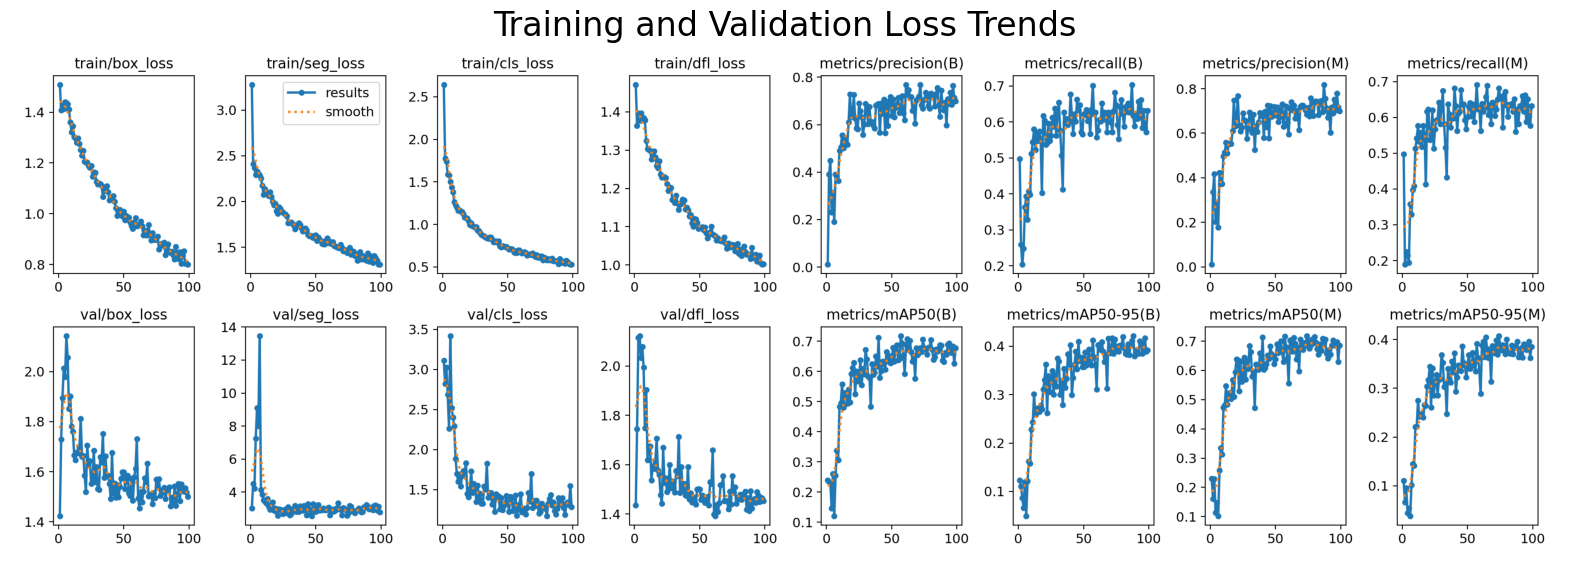

In [21]:
# Create the full file path by joining the directory path with the filename
results_file_path = os.path.join(post_training_files_path, 'results.png')

# Read the image using cv2
image = cv2.imread(results_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Display the image using matplotlib
plt.figure(figsize=(20, 8))
plt.imshow(image)
plt.title('Training and Validation Loss Trends', fontsize=24)
plt.axis('off') 
plt.show()

In [22]:
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

best_model = YOLO(best_model_path)

metrics = best_model.val(split='val')

Ultralytics 8.3.133 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 149.3±77.7 MB/s, size: 93.2 KB)


val: Scanning /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 518.74it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:00<00:02,  1.32it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:01<00:01,  1.45it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


                   all         60        201       0.67      0.682      0.706      0.413      0.683      0.682      0.718      0.406
Speed: 5.4ms preprocess, 6.1ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/segment/val2


In [23]:
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

metrics_df.round(3)

,Metric Value
metrics/precision(B),0.670
metrics/recall(B),0.682
metrics/mAP50(B),0.706
metrics/mAP50-95(B),0.413
metrics/precision(M),0.683
metrics/recall(M),0.682
metrics/mAP50(M),0.718
metrics/mAP50-95(M),0.406
fitness,0.880


In [25]:
# Export the model
best_model.export(format='onnx')

Ultralytics 8.3.133 🚀 Python-3.10.12 torch-2.0.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (6.5 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: slimming with onnxslim 0.1.52...
ONNX: export success ✅ 1.6s, saved as '/kaggle/working/runs/segment/train/weights/best.onnx' (12.7 MB)

Export complete (1.9s)
Results saved to /kaggle/working/runs/segment/train/weights
Predict:         yolo predict task=segment model=/kaggle/working/runs/segment/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=segment model=/kaggle/working/runs/segment/train/weights/best.onnx imgsz=640 data=/kaggle/input/pothole-image-segmentatio

'/kaggle/working/runs/segment/train/weights/best.onnx'